# 6.5 Machine Learning Part 2

### This script contains the following:
#### 1. Importing resources
#### 2. Data cleaning and preparation
#### 3. The elbow technique
#### 4. k-means clustering

### 1. Importing resources

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
#%matplotlib inline

# Ensures an interactive 3D plot(the last plot of this notebook)
%matplotlib notebook

In [2]:
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\Achievement 6\11-2023 Berlin Housing Price Analysis'

In [3]:
# Import dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cleaned.pkl'))

In [4]:
df.head()

,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
2110,Fernwärme,Kamin,15900000.0,546.00,9.0,3.57,10407.0,1875.0,1.0,29120.879121
3718,"Fußbodenheizung, offener",Zentralheizung,1650000.0,72.74,3.0,3.57,14193.0,1995.0,1.0,22683.530382
3959,na,na,4150000.0,191.40,3.0,2.38,10117.0,2015.0,4.0,21682.340648
4487,na,na,9900000.0,462.00,10.0,3.57,10117.0,2009.0,1.0,21428.571429
2232,na,na,6900000.0,326.90,9.0,3.57,10719.0,2022.0,5.0,21107.372285


### 2. Data cleaning and preparation

In [5]:
# remove categorical/string columns from the data
df_sub = df[['price', 'area', 'rooms', 'fee', 'zipcode', 'construction_year', 'level', 'price_per_area']]

In [6]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 2110 to 4002
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              4937 non-null   float64
 1   area               4937 non-null   float64
 2   rooms              4937 non-null   float64
 3   fee                4937 non-null   float64
 4   zipcode            4937 non-null   float64
 5   construction_year  4937 non-null   float64
 6   level              4937 non-null   float64
 7   price_per_area     4937 non-null   float64
dtypes: float64(8)
memory usage: 347.1 KB


##### Standardize the data

In [7]:
# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df_sub)

In [8]:
df_std

array([[25.82613617,  7.94711865,  4.05350245, ..., -1.74242089,
        -0.41289111,  9.20914136],
       [ 1.83204788, -0.21101331,  0.13224418, ...,  0.91632621,
        -0.41289111,  6.60524968],
       [ 6.04153706,  1.83446684,  0.13224418, ...,  1.35945073,
         0.20826991,  6.2002709 ],
       ...,
       [ 0.5018493 ,  9.51958368, 12.54956206, ...,  0.0522334 ,
         0.20826991, -2.02426753],
       [ 0.53838767, 10.22652065, 12.54956206, ...,  0.93848244,
        -0.41289111, -2.04433502],
       [-0.66838869,  1.38627466, -1.17484192, ...,  0.0522334 ,
        -0.41289111, -2.16666311]])

##### Reduce dimensionality by using PCA

In [9]:
# Use Principal Components Analysis (PCA) to reduce dimensionality of the dataset
pca = PCA()
pca = pca.fit(df_std)

In [10]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.32828348, 0.20115022, 0.1468527 , 0.12448509, 0.08968025,
       0.06939578, 0.02992026, 0.01023222])

<IPython.core.display.Javascript object>


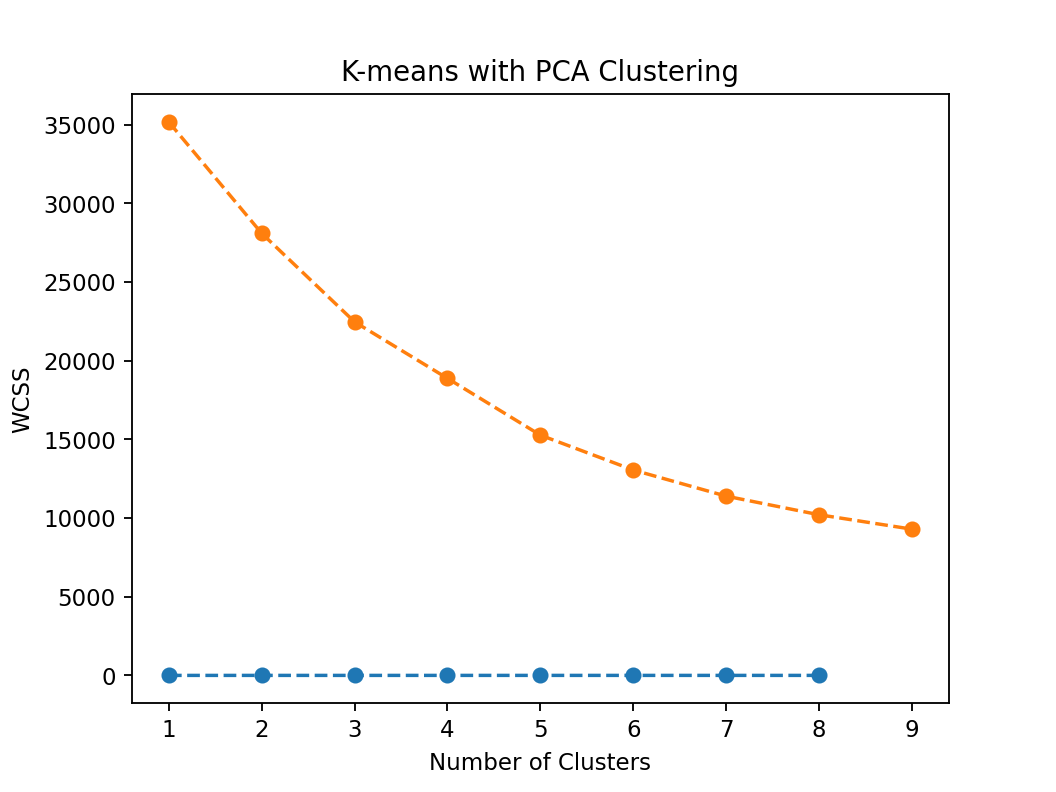

In [11]:
# Plot the cumulative variance explained by total number of components.
# On this graph, we choose the subset of components we want to keep
# Generally, we want to keep around 80% of the explained variance.
plt.plot(range(1,9), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle ='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In this case, since the dataset only has about 5000 rows, I will keep 5 components instead of 8, so that the dimensionality is reduced while still keeping more than 90% of the dataset.

In [11]:
# Choose 6 components based on the above graph.
pca = PCA(n_components=5)

In [12]:
pca.fit(df_std)

PCA(n_components=5)

In [13]:
pca.transform(df_std)

array([[23.58022944,  7.77013311, -4.19451652, -1.43472981, -3.3602919 ],
       [ 2.44833321,  4.56657162, -1.16643563, -0.21031015, -2.91729762],
       [ 6.11798658,  5.19499075, -3.19669529, -0.97158629, -2.08169754],
       ...,
       [11.13301752, -2.73253077,  8.00966967, -0.087164  ,  5.49057282],
       [11.79732225, -2.92482379,  7.94585494,  2.06723723,  4.62665089],
       [-0.72402168, -1.45764005,  0.96590045, -0.16602603,  0.1954467 ]])

In [14]:
scores_pca = pca.transform(df_std)

### 3. The elbow technique

In [15]:
# We fit L means using the transformed data from the PCA.
wcss = []
for i in range (1,10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [17]:
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--' )
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.grid()

The "elbow" isn't very visible here - it could be at k = 3, 4, and 5, or other values. I will use Silhouette score to further investigate.

##### Silhouette score

In [18]:
silhouette = silhouette_score(scores_pca, kmeans_pca.labels_)
print('Silhouette Score = {:.3f}'.format(silhouette))

Silhouette Score = 0.333


In [16]:
# visualize silhouette score
silhouette_avg = []
for i in range (2,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    silhouette_avg.append(silhouette_score(scores_pca, kmeans.labels_))

C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

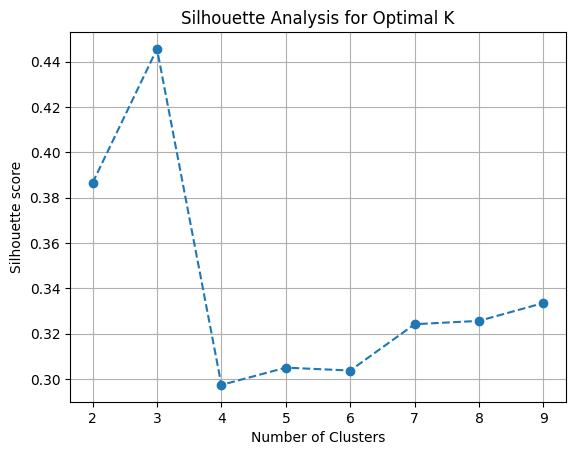

In [38]:
plt.plot(range(2,10), silhouette_avg, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis for Optimal K')
plt.grid()

The silhouette score is maximized at k=3, I will take 3 clusters.

### 4. K-Means clustering

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [18]:
kmeans.fit(scores_pca)

C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [19]:
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\zhoux\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhoux\AppData\Local\Temp\ipykernel_94848\4169945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [20]:
df_sub.head()

,price,area,rooms,fee,zipcode,construction_year,level,price_per_area,clusters
2110,15900000.0,546.00,9.0,3.57,10407.0,1875.0,1.0,29120.879121,2
3718,1650000.0,72.74,3.0,3.57,14193.0,1995.0,1.0,22683.530382,1
3959,4150000.0,191.40,3.0,2.38,10117.0,2015.0,4.0,21682.340648,2
4487,9900000.0,462.00,10.0,3.57,10117.0,2009.0,1.0,21428.571429,2
2232,6900000.0,326.90,9.0,3.57,10719.0,2022.0,5.0,21107.372285,2


In [21]:
df_sub['clusters'].value_counts(dropna=False)

clusters
0    4114
1     790
2      33
Name: count, dtype: int64

In [23]:
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_clusters.csv'))

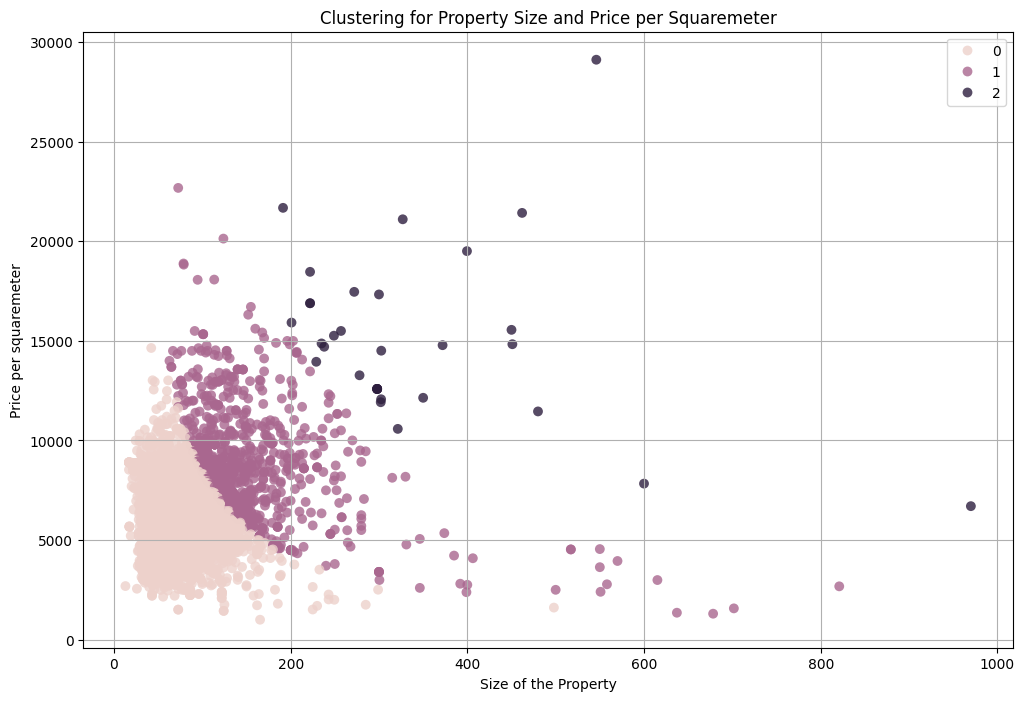

In [44]:
# Plot the clusters for the variables 'area' and 'price_per_area'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['area'], 
                     y=df_sub['price_per_area'], 
                     hue=kmeans.labels_, 
                     alpha = 0.8,
                     linewidth=0,
                     s=50)
plt.title('Clustering for Property Size and Price per Squaremeter')
plt.xlabel('Size of the Property')
plt.ylabel('Price per squaremeter')
plt.grid()
plt.show()

Property size 'area' and Price per Squaremeter 'price_per_area' seems to have a logarithmic relationship -  a visible decelerating decay. Especially in cluster 1, the price drops radically when the size lies between 100-200 qm. In cluster 0, most of the datapoints center between 0-200qm, and the datapoints seem to also have a non-linear trendline. The reason behind these patterns are not yet clear. Conclusion: the graph shows a non-linear relationship between these two variables. 

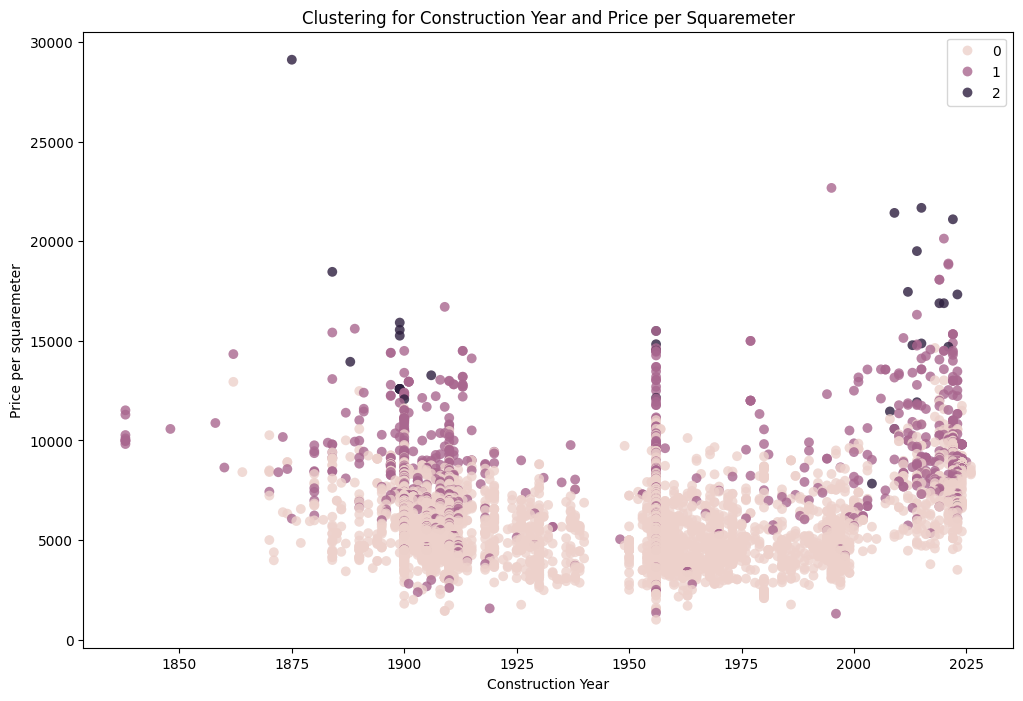

In [45]:
# Plot the clusters for the variables 'construction_year' and 'price_per_area'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['construction_year'], 
                     y=df_sub['price_per_area'], 
                     hue=kmeans.labels_, 
                     alpha=0.8,
                     linewidth=0,
                     s=50)
plt.title('Clustering for Construction Year and Price per Squaremeter')
plt.xlabel('Construction Year')
plt.ylabel('Price per squaremeter')
plt.show()

The graph shows that properties of different price levels were constructed throughout in the past, except a break between around 1940-1950. World War II happened during 1939-1945, where Berlin was severely destroyed by bombardment. After the war, West Berlin and East Berlin might have different construction priorities, with the top priority being rebuilding essential infrastructures. The properties constructed before 1980 have significantly poorer qualities due to the shortage of materials, the lack of regulation and the cost-saving construction methods. </br></br>
The property constructed after year 2000 has a visible price increase. However, there is another break between around 2005-2010. The global financial crisis in 2008 could be a major reason. After this period, the newly built properties and the soon-to-be-finished ones are experiencing a consistently increasing price.

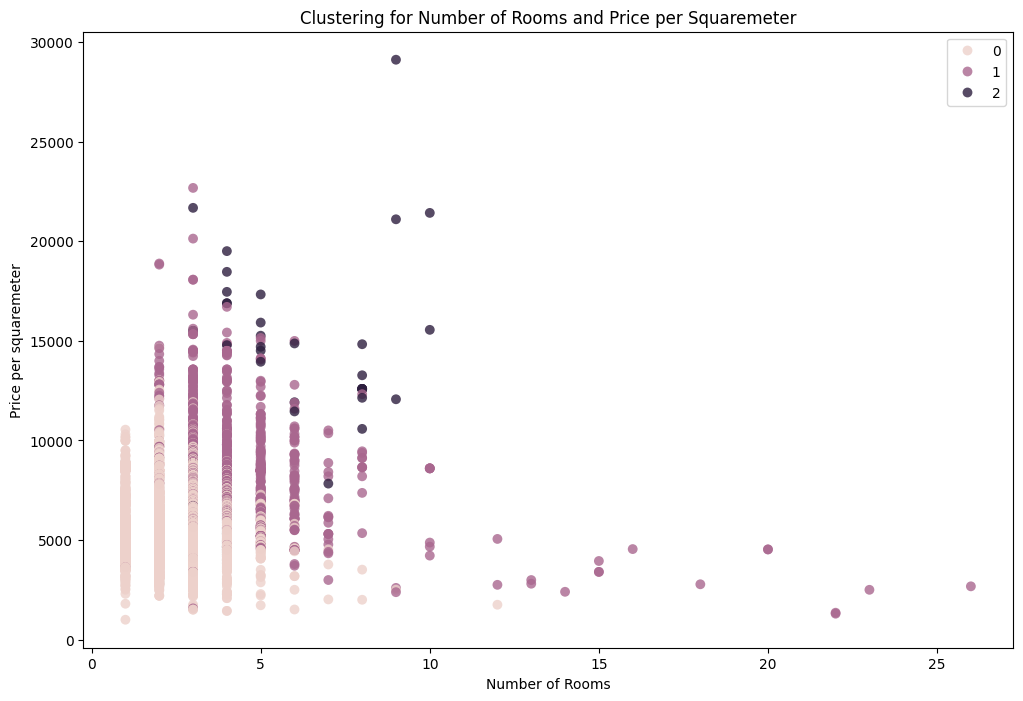

In [46]:
# Plot the clusters for the variables 'rooms' and 'price_per_area'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['rooms'], 
                     y=df_sub['price_per_area'], 
                     hue=kmeans.labels_, 
                     alpha=0.8,
                     linewidth=0,
                     s=50)
plt.title('Clustering for Number of Rooms and Price per Squaremeter')
plt.xlabel('Number of Rooms')
plt.ylabel('Price per squaremeter')
plt.show()

The number of rooms 'rooms' and Price per Squaremeter 'price_per_area' seems to have a non-linear relationship. The underlying patterns seem somewhat similar to the patterns between 'area' and 'price_per_area'. The reason behind these patterns are not yet clear.

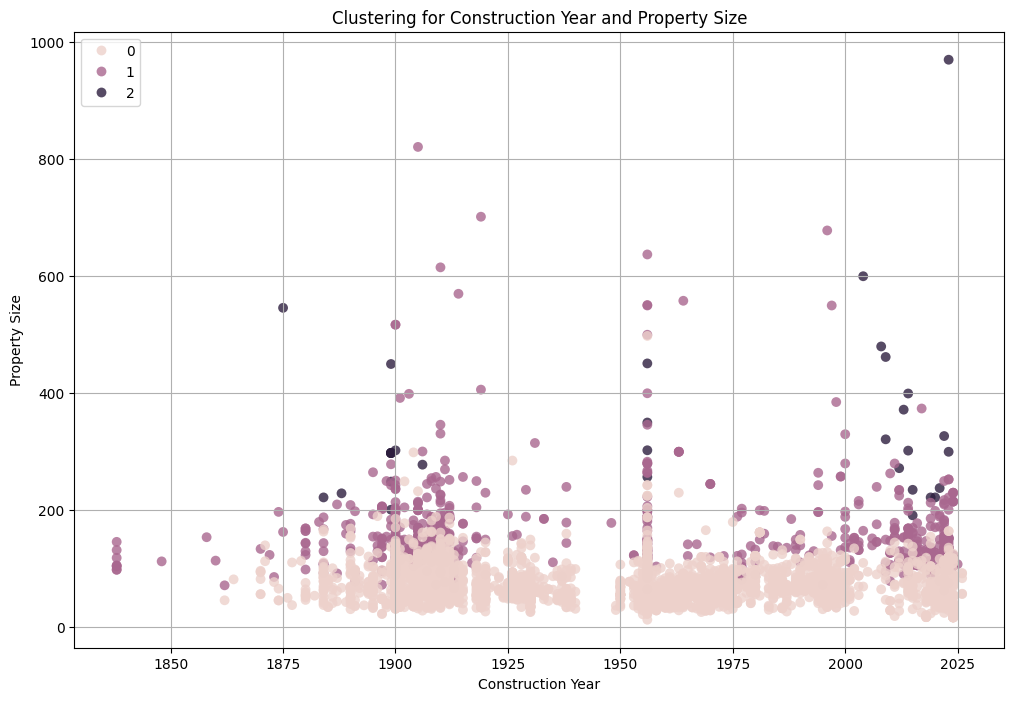

In [47]:
# Plot the clusters for the variables 'construction_year' and 'area'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['construction_year'], 
                     y=df_sub['area'], 
                     hue=kmeans.labels_, 
                     alpha=0.8,
                     linewidth=0,
                     s=50)
plt.title('Clustering for Construction Year and Property Size')
plt.xlabel('Construction Year')
plt.ylabel('Property Size')
plt.grid()
plt.show()

The graph shows a pattern similar to the relationship between construction year and price_per_area.  

The property constructed after year 2000 has a visible increase in size, while the ones built after WW II are mostly smaller than 100qm. The global financial crisis in 2008 might had a larger influence on smaller properties (<100qm) than larger ones. Some properties from recent years (2023) have historically small sizes, and some have increasingly larger sizes, an interesting social-economical phenomena that must have multiple causes. 

Added note: my previous analysis indicated that some recently constructed properties are small in size, but expensive in price. Thus, in terms of recently constructed properties, a small size does not equal to cheaper price; in the contrary, these properties might be more expensive. After a conversation with a friend who knows the berlin housing market, I learned that the expensive small apartments are new constructions, and that the material and labor cost has drastically increased since corona. The economy is going down, more and more people could not afford larger properties, so the market offers smaller ones as a solution. The consistent price increase in recent years are also due to the cost rising.

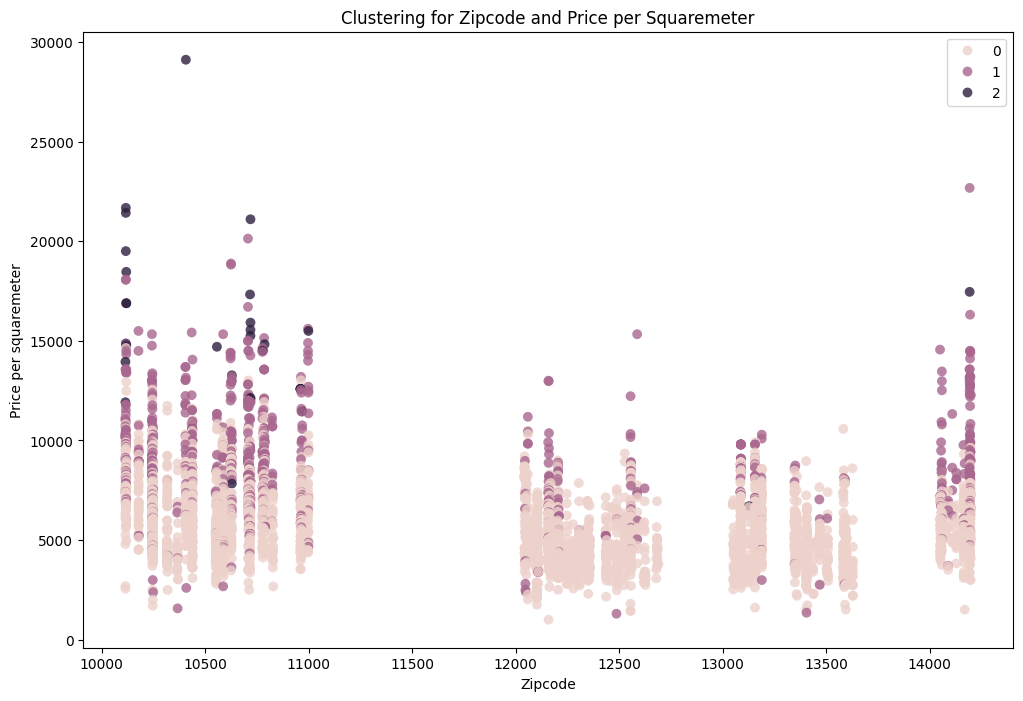

In [48]:
# Plot the clusters for the variables 'zipcode' and 'price_per_area'
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['zipcode'], 
                     y=df_sub['price_per_area'], 
                     hue=kmeans.labels_, 
                     alpha=0.8,
                     linewidth=0,
                     s=50)
plt.title('Clustering for Zipcode and Price per Squaremeter')
plt.xlabel('Zipcode')
plt.ylabel('Price per squaremeter')
plt.show()

There is a significant relationship between price_per_area and Berlin districts. The zipcode between 10115-10999 are popular districts in Berlin city, while 12059-13629 are less popular and are surrounding areas. The districts in 14163-14199 are known to be expensive. The blanks simply means that the zipcode does not exist.

<IPython.core.display.Javascript object>


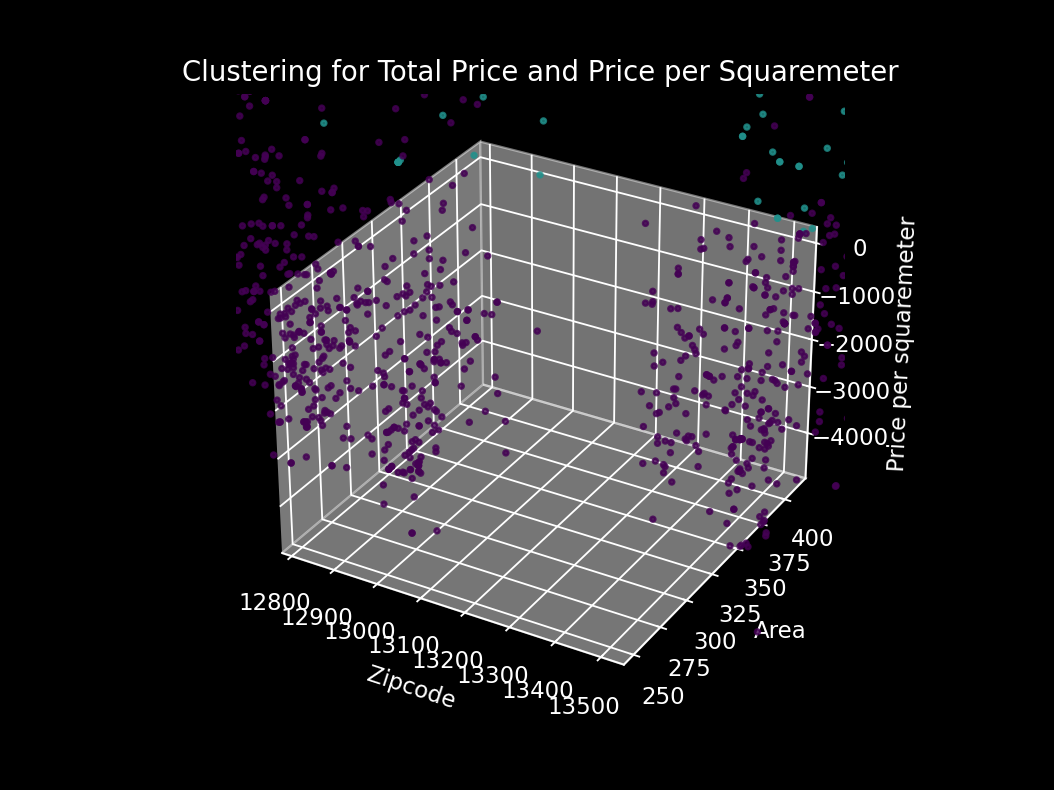

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sub['zipcode'], 
           df_sub['area'], 
           df_sub['price_per_area'], 
           alpha=0.8,
           linewidth=None,
           c=kmeans.labels_.astype(float),
           s=5
          )

ax.set_title('Clustering for Total Price and Price per Squaremeter')
ax.set_xlabel('Zipcode')
ax.set_ylabel('Area')
ax.set_zlabel('Price per squaremeter')
#plt.style.use('dark_background')
plt.show()

I attempted to use this graph to answer my question "Which district(s) in Berlin tend to have larger floor area with a lower price?" It investigates the relationship among three variables: zipcode, area, and price_per_area. The graph doesn't show a clear answer, because all districts have properties of different sizes on sale with a matching price. An assumption purely based on my experience would be "the surrounding areas with the zipcode 12059-13029 have larger size with lower price". Yet, I couldn't confirm this because I don't really know how to interpret the non-linear relationship within each of the three clusters when looking at the variable pair 'area'-'price_per_area'.

In [48]:
# Calculate the descriptive statistics for the clusters using the groupby() function
# Discuss the findings.
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark purple'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'faint red'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'light pink'

In [49]:
df_sub.groupby('cluster').agg({'price':['mean', 'median'], 
                         'area':['mean', 'median'], 
                         'rooms':['mean', 'median'],
                          'fee':['mean', 'median'],
                         'zipcode':['mean', 'median'], 
                         'construction_year':['mean', 'median'], 
                         'level':['mean', 'median'],
                         'price_per_area':['mean', 'median']})

price                   area            rooms         \
                     mean     median        mean median      mean median   
cluster                                                                    
dark purple  4.999682e+06  3983500.0  340.662727  298.0  6.272727    6.0   
faint red    1.312852e+06  1119300.0  157.531241  139.0  4.441772    4.0   
light pink   3.821638e+05   345400.0   68.998525   65.0  2.454059    2.0   

                  fee              zipcode          construction_year          \
                 mean median          mean   median              mean  median   
cluster                                                                         
dark purple  3.467273   3.57  10743.060606  10719.0       1960.909091  1956.0   
faint red    3.812595   3.57  11589.817722  10781.0       1954.375949  1956.0   
light pink   3.663226   3.57  12023.942392  12169.0       1953.443364  1956.0   

                level        price_per_area                
                 mean median           mean        median  
cluster                                                    
dark purple  1.818182    1.0   15112.305286  14784.946237  
faint red    1.973418    1.0    8948.270751   8656.988436  
light pink   3.199562    1.0    5785.590691   5365.033892

The K-means divided all properties to three categories. From the chart above, it is clear that they differentiate by area, room count, price_per_area, and maybe also construction year. The stark distinctions effectively shows that the clustering is meaningful to the dataset. Based on these clusters, I can classify the properties into three categories: high end, mid-end, and lower end.

##### Propose what these results could be useful for in future steps of an analytics pipeline.


1. I can immediately classify the properties into three categories: high end, mid-end, and lower end.
2. I can group the construction years to form labels such as "Properties Built Recently", "Properties built after WW2", "Properties that survived WW2"; I can also form groups using other variables like zipcode, and form labels such as "central districts", "non-central districts".
3. After doing the above classification, I can use supervised machine learning for prediction.
3. I can also consult chatGPT, and interview people in relevant industries who understand Berlin housing market's changes over the years, show them the graphs, and gain a more complete picture of the patterns/the historical reasons behind the patterns, so that I can come up with more meaningful questions or hypothesis for the analysis.